# Import Library

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

In [2]:
data_folder = './data'
dfs = []

for dataset in os.listdir(data_folder):
    data_path = os.path.join(data_folder, dataset)
    df = pd.read_csv(data_path)
    dfs.append(df)

In [3]:
data = pd.concat(dfs)
data.sample(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
31607,31608,2016,10,7,23,3.0,6.0,2.0,16.0,300.0,45.0000,15.9,1014.80,0.0,0.0,WNW,4.1,Wanshouxigong
12582,12583,2014,8,7,6,78.0,115.0,6.0,82.0,1200.0,9.0000,24.1,1006.00,17.6,0.0,NE,1.6,Nongzhanguan
33925,33926,2017,1,12,13,51.0,87.0,25.0,37.0,700.0,40.0000,4.1,1017.25,-12.0,0.0,NW,3.4,Nongzhanguan
29180,29181,2016,6,28,20,128.0,128.0,2.0,44.0,1000.0,58.0000,21.9,1001.70,18.9,0.0,SE,1.3,Guanyuan
14199,14200,2014,10,13,15,11.0,11.0,3.0,18.0,200.0,52.0000,18.1,1017.70,-5.2,0.0,W,1.9,Guanyuan
10368,10369,2014,5,7,0,86.0,116.0,21.0,62.0,1300.0,56.0000,14.8,994.60,5.0,0.0,ESE,1.0,Changping
4142,4143,2013,8,20,14,66.0,53.0,25.0,15.0,1000.0,198.0000,30.7,1003.70,18.8,0.0,SSW,2.1,Dongsi
24156,24157,2015,12,2,12,5.0,5.0,2.0,11.0,400.0,52.0000,3.5,1015.40,-12.9,0.0,WNW,6.2,Dongsi
3440,3441,2013,7,22,8,132.0,157.0,11.0,52.0,NaN,26.1324,28.7,1001.10,21.7,0.0,E,0.7,Nongzhanguan
18273,18274,2015,4,1,9,109.0,129.0,6.0,75.0,1200.0,10.0000,10.2,1015.00,3.2,0.0,SSW,1.5,Changping


**Keterangan setiap fitur:**
- **year**: Tahun pengukuran data
- **month**: Bulan pengukuran data
- **day**: Tanggal pengukuran data
- **hour**: Waktu pengukuran data (format 24 jam)
- **PM (Particulate Matter)**: Campuran partikel padat dan cair yang tersuspensi di udara (&micro;g/m<sup>3</sup>)
  - **PM2.5**: Partikel dengan diameter kurang dari atau sama dengan 2.5 mikrometer
  - **PM10**: Partikel dengan diameter kurang dari atau sama dengan 10 mikrometer
- **SO2**: Konsentrasi sulfur dioksida (&micro;g/m<sup>3</sup>)
- **NO2**: Konsentrasi karbon monoksida (&micro;g/m<sup>3</sup>)
- **CO**: Konsentrasi karbon monoksida (&micro;g/m<sup>3</sup>)
- **O3**: Konsentrasi ozon (&micro;g/m<sup>3</sup>)
- **TEMP**: Temperatur (Celcius)
- **PRES**: Tekanan udara (hPa)
- **DEWP**: Suhu titik embun (Dew Point Temperature) (Celcius)
- **RAIN**: Curah hujan (mm)
- **wd**: Arah angin (Wind Direction)
- **WSPM**: Kecepatan angin (m/s)

## Assessing Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


In [5]:
data.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [6]:
total_duplicates = data.duplicated().sum()
print(f'Dataset memiliki {total_duplicates} data duplikat')

Dataset memiliki 0 data duplikat


In [7]:
data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [8]:
data.select_dtypes('object').describe()

,wd,station
count,418946,420768
unique,16,12
top,NE,Aotizhongxin
freq,43335,35064


## Cleaning Data

In [9]:
# melihat persentase data yang memiliki missing value
missing = data.isna().sum()/len(data) * 100
missing[missing > 0]

PM2.5    2.076916
PM10     1.532674
SO2      2.143937
NO2      2.879497
CO       4.919813
O3       3.155421
TEMP     0.094589
PRES     0.093401
DEWP     0.095777
RAIN     0.092688
wd       0.433018
WSPM     0.075576
dtype: float64

In [4]:
# karena data berurutan berdasarkan waktu, maka missing value menggunakan interpolasi linear
df = data.interpolate()

idx = data[data.isna().any(axis=1)].index
df.info()

C:\Users\Lutfi Kurrotaeni\AppData\Local\Temp\ipykernel_22572\1461487818.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = data.interpolate()


<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


In [5]:
# kolom `wd` masih memiliki missing value sehingga akan dihapus
df = df.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418946 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       418946 non-null  int64  
 1   year     418946 non-null  int64  
 2   month    418946 non-null  int64  
 3   day      418946 non-null  int64  
 4   hour     418946 non-null  int64  
 5   PM2.5    418946 non-null  float64
 6   PM10     418946 non-null  float64
 7   SO2      418946 non-null  float64
 8   NO2      418946 non-null  float64
 9   CO       418946 non-null  float64
 10  O3       418946 non-null  float64
 11  TEMP     418946 non-null  float64
 12  PRES     418946 non-null  float64
 13  DEWP     418946 non-null  float64
 14  RAIN     418946 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     418946 non-null  float64
 17  station  418946 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 60.7+ MB


## Feature Engineering

Berdasarkan Air Quality Index (AQI) yang diterbitkan oleh [IQAir](https://www.iqair.com/id/), kualitas udara dapat dikategorikan berdasarkan 6 polutan udara, yaitu PM2.5, PM10, SO2, NO2, CO, dan O3. Dalam [artikel lain](https://support.iqair.com/id/articles/3029437-bagaimana-aqi-dihitung-tanpa-keenam-polutan-utama) disebutkan bahwa polutan dengan nilai AQI tertinggi menentukan nilai AQI secara keseluruhan untuk semua polutan. Meskipun demikian, sebagian besar lokasi menggunakan nilai **PM2.5** sebagai polutan utama. Oleh karena itu, di sini akan menggunakan nilai PM2.5 sebagai acuan AQI level.<br>

<img src="../data%20science/2236_WHO_Guidlines_Chart_UPDATE_AQI_2024.webp" alt="AQI Guidelines" width="1000"/>

Sumber: [www.iqair.com](https://www.iqair.com/id/newsroom/what-is-aqi?srsltid=AfmBOoq1qEp5ogbJ3xOxyDN2Eux1Z7jILnFDsCqkdFc6CyssEA0e0mDW)

In [6]:
def AQI(value):
    if value < 9.1:
        return 'Good'
    elif value < 35.5:
        return 'Moderate'
    elif value < 55.5:
        return 'Unhealthy for Sensitive Groups'
    elif value < 125.5:
        return 'Unhealthy'
    elif value < 225.5:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

In [16]:
df['AQI'] = df['PM2.5'].apply(AQI)

# EDA

## Pertanyaan analisis:
1. Bagaimana tren polusi udara di setiap kota pada tahun 2016? Apakah ada hubungan antar polutan?
2. Bagaimana tren suhu dan tekanan udara di setiap kota pada tahun 2016? Bagaimana persebaran arah anginnya?

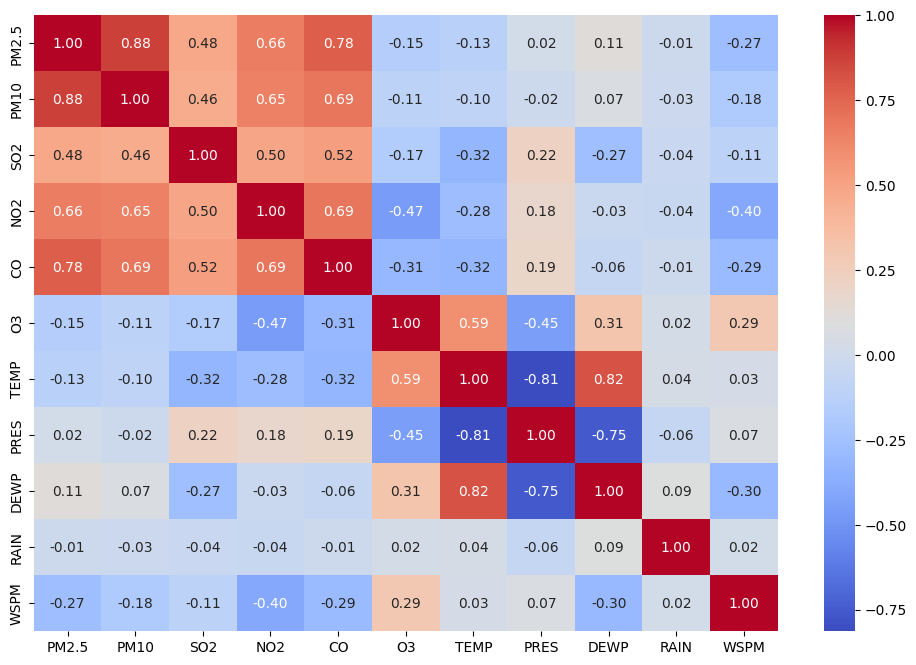

In [17]:
corr = df.select_dtypes('float').corr()

plt.figure(figsize=(12, 8))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

- Hubungan antar polutan (PM2.5, PM10, SO2, NO2, CO) cenderung menunjukkan nilai korelasi yang sedang dengan nilai terendahnya adalah 0.46. Selain itu, PM2.5 menunjukkan korelasi yang kuat dengan PM10 dan CO.
- Adapun polutan O3 menunjukkan korelasi negatif lemah hingga sedang dengan polutan lainnya. Namun demikian, O3 memiliki nilai korelasi yang sedang dengan temperatur udara.
- Temperatur udara, tekanan udara, dan kecepatan angin saling memiliki korelasi kuat dengan arah yang berbeda. Temperatur dengan kecepatan angin berkorelasi positif, sementara korelasi lainnya negatif. 

## Tingkat polusi udara

In [7]:
pol_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'O3', 'CO']

In [22]:
polutan = df.groupby('year')[pol_cols].mean()
polutan

,PM2.5,PM10,SO2,NO2,O3,CO
year,,,,,,
2013,79.745133,103.185869,19.999385,52.046396,56.272634,1204.889697
2014,86.186702,116.825096,21.205783,55.049332,57.899456,1271.163714
2015,79.216248,103.572019,13.008082,48.285667,59.459039,1260.608729
2016,71.900325,94.579549,9.789935,46.053343,58.403474,1134.966805
2017,91.923325,110.444663,17.943596,56.869789,40.267226,1605.030652


Dari tahun 2013 hingga 2017, indeks kualitas udara menunjukkan kategori **Tidak Sehat**. Hal itu berarti ada peningkatan kemungkinan ganggunan kesehatan pada jantung dan paru-paru.

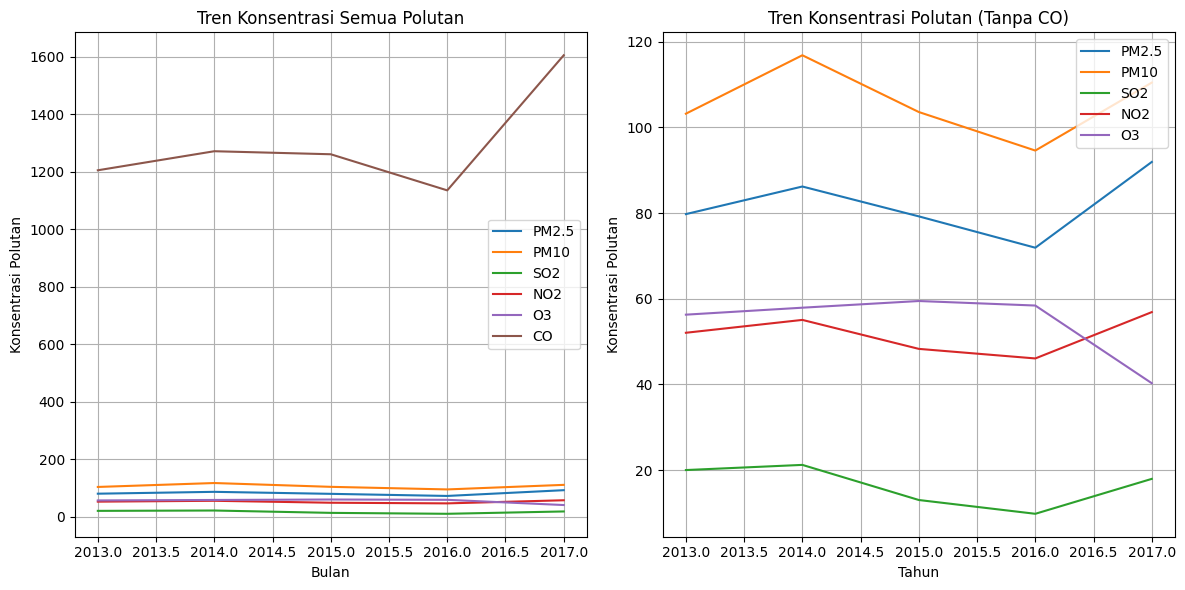

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot keseluruhan polutan, termasuk CO di subplot pertama
ax[0].plot(polutan.index, polutan)
ax[0].set_title('Tren Konsentrasi Semua Polutan')
ax[0].legend(polutan.columns)
ax[0].set_xlabel('Bulan')
ax[0].set_ylabel('Konsentrasi Polutan')
ax[0].grid(True)

# Plot polutan selain CO di subplot kedua
ax[1].plot(polutan.index, polutan.drop(columns='CO'))
ax[1].set_title('Tren Konsentrasi Polutan (Tanpa CO)')
ax[1].legend(polutan.drop(columns='CO').columns)
ax[1].set_xlabel('Tahun')
ax[1].set_ylabel('Konsentrasi Polutan')
ax[1].grid(True)

plt.tight_layout()
plt.show()

CO merupakan kontributor polutan terbesar pada setiap tahunnya dengan konsentrasi yang jauh lebih tinggi dibanding polutan lainnya. Tingginya kadar CO ini dapat disebabkan oleh aktivitas industri dan kendaraan bermotor.<br>
Pada tahun 2016, hampir semua polutan mencapai titik terendahnya. Namun, terjadi peningkatan konsentrasi polutan yang signifikan pada tahun berikutnya. Meskipun demikian, konsentrasi **O3** mengalami penurunan yang signifikan pada tahun tersebut.

In [26]:
polutan = df[df['year'] == 2016].groupby('month')[pol_cols].mean()
polutan

,PM2.5,PM10,SO2,NO2,O3,CO
month,,,,,,
1,66.702927,82.441404,19.874005,50.513401,30.209207,1562.924750
2,42.615856,56.948529,14.517898,33.409189,48.718198,878.444444
3,92.176896,134.391551,17.778875,55.271432,48.795274,1210.166068
4,67.497101,114.040584,9.804905,41.803108,71.545571,779.029453
5,54.386560,86.937497,8.085830,36.151489,96.119440,677.805371
6,58.708872,76.041757,5.019472,34.076800,109.551933,742.713591
7,68.698077,77.229349,3.482797,31.592178,101.403012,894.380227
8,45.839053,58.084440,2.861161,32.911847,78.738749,817.510380
9,53.243638,67.270514,3.384895,40.294066,55.646049,743.287267


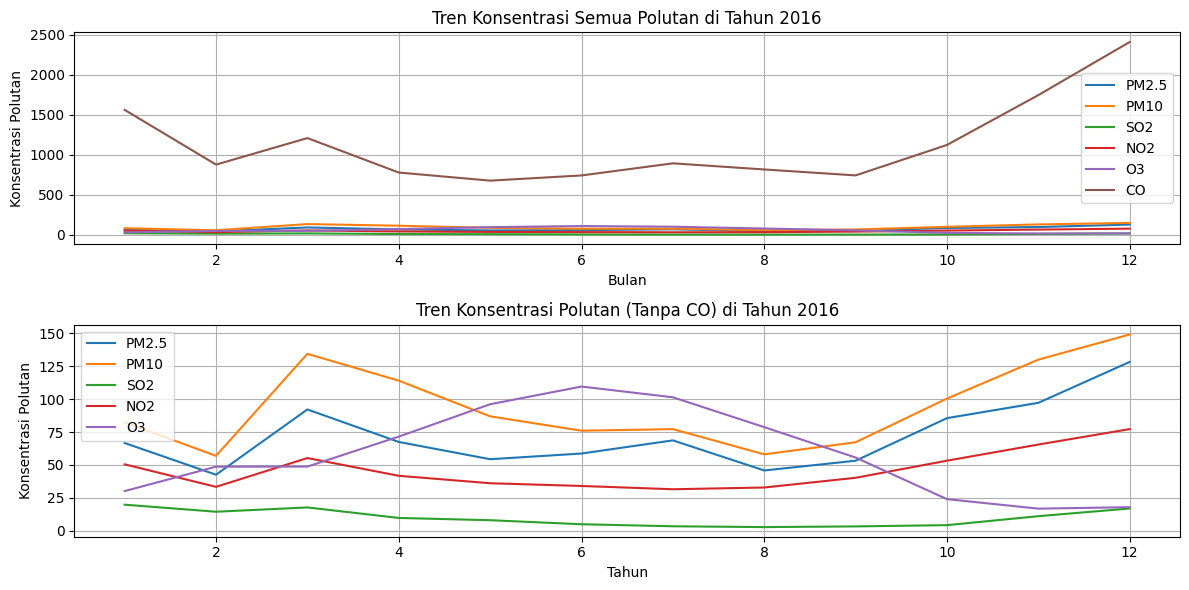

In [27]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6))

# Plot keseluruhan polutan, termasuk CO di subplot pertama
ax[0].plot(polutan.index, polutan)
ax[0].set_title('Tren Konsentrasi Semua Polutan di Tahun 2016')
ax[0].legend(polutan.columns)
ax[0].set_xlabel('Bulan')
ax[0].set_ylabel('Konsentrasi Polutan')
ax[0].grid(True)

# Plot polutan selain CO di subplot kedua
ax[1].plot(polutan.index, polutan.drop(columns='CO'))
ax[1].set_title('Tren Konsentrasi Polutan (Tanpa CO) di Tahun 2016')
ax[1].legend(polutan.drop(columns='CO').columns)
ax[1].set_xlabel('Tahun')
ax[1].set_ylabel('Konsentrasi Polutan')
ax[1].grid(True)

plt.tight_layout()
plt.show()

Dari bulan Maret hingga Agustus yang merupakan musim semi dan musim panas, hampir semua konsentrasi polutan (PM2.5, PM10, SO2, NO2, dan CO) menunjukkan tren penurunan. Namun dari bulan Agusutus hingga akhir tahun, konsentrasi CO, PM2.5, PM10, dan NO2 naik signifikan.<br> 
Berbeda halnya dengan O3 yang terus naik dari awal tahun hingga bulan Juni dan berbalik turun hingga akhir tahun. Pola tersebut berkaitan dengan pembentukan ozon yang lebih intens di musim panas.

In [28]:
df.groupby(['month'])['RAIN'].mean()

month
1     0.000357
2     0.009816
3     0.007589
4     0.022918
5     0.045905
6     0.133086
7     0.268070
8     0.096504
9     0.125268
10    0.041491
11    0.018563
12    0.001107
Name: RAIN, dtype: float64

Rata-rata curah hujan di beberapa wilayah RRC menunjukkan peningkatan signifikan dari bulan Juni hingga September dengan puncaknya pada bulan Juli.

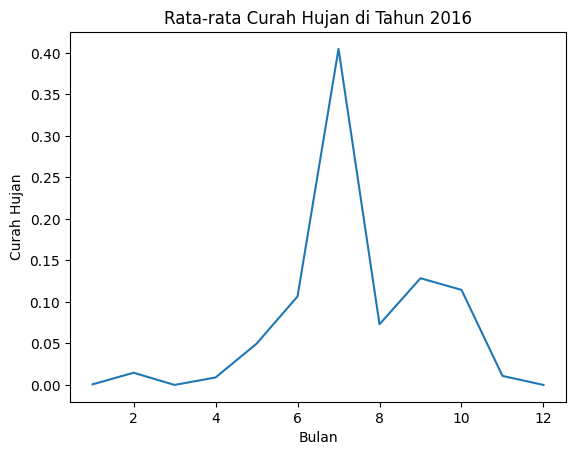

In [29]:
rain = df[df['year'] == 2016].groupby('month')['RAIN'].mean()

rain.plot(kind='line', title='Rata-rata Curah Hujan di Tahun 2016')
plt.xlabel('Bulan')
plt.ylabel('Curah Hujan')

plt.show()

Pada bulan-bulan kering seperti Januari-April dan November-Desember juga menunjukkan polutan yang cukup tinggi. Hal tersebut menunjukkan bahwa kurangnya mekanisme pembersihan alami oleh hujan mengakibatkan konsentrasi polutan yang lebih tinggi.

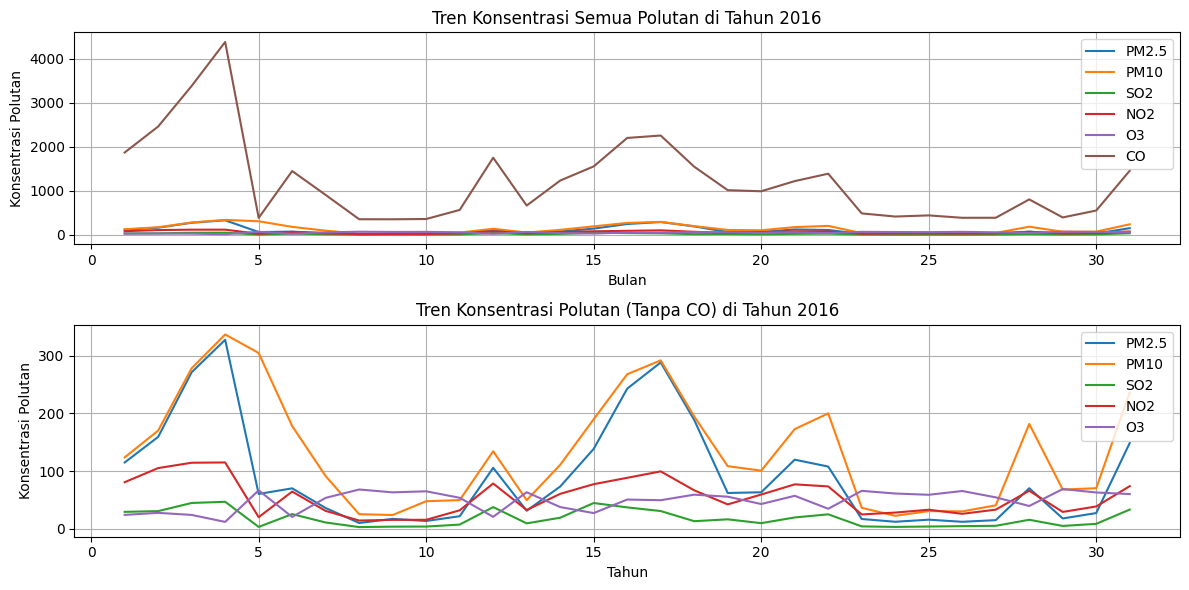

In [30]:
polutan = df[(df['year'] == 2016) & (df['month'] == 3)].groupby('day')[pol_cols].mean()

fig, ax = plt.subplots(2, 1, figsize=(12, 6))

# Plot keseluruhan polutan, termasuk CO di subplot pertama
ax[0].plot(polutan.index, polutan)
ax[0].set_title('Tren Konsentrasi Semua Polutan di Tahun 2016')
ax[0].legend(polutan.columns)
ax[0].set_xlabel('Bulan')
ax[0].set_ylabel('Konsentrasi Polutan')
ax[0].grid(True)

# Plot polutan selain CO di subplot kedua
ax[1].plot(polutan.index, polutan.drop(columns='CO'))
ax[1].set_title('Tren Konsentrasi Polutan (Tanpa CO) di Tahun 2016')
ax[1].legend(polutan.drop(columns='CO').columns)
ax[1].set_xlabel('Tahun')
ax[1].set_ylabel('Konsentrasi Polutan')
ax[1].grid(True)

plt.tight_layout()
plt.show()

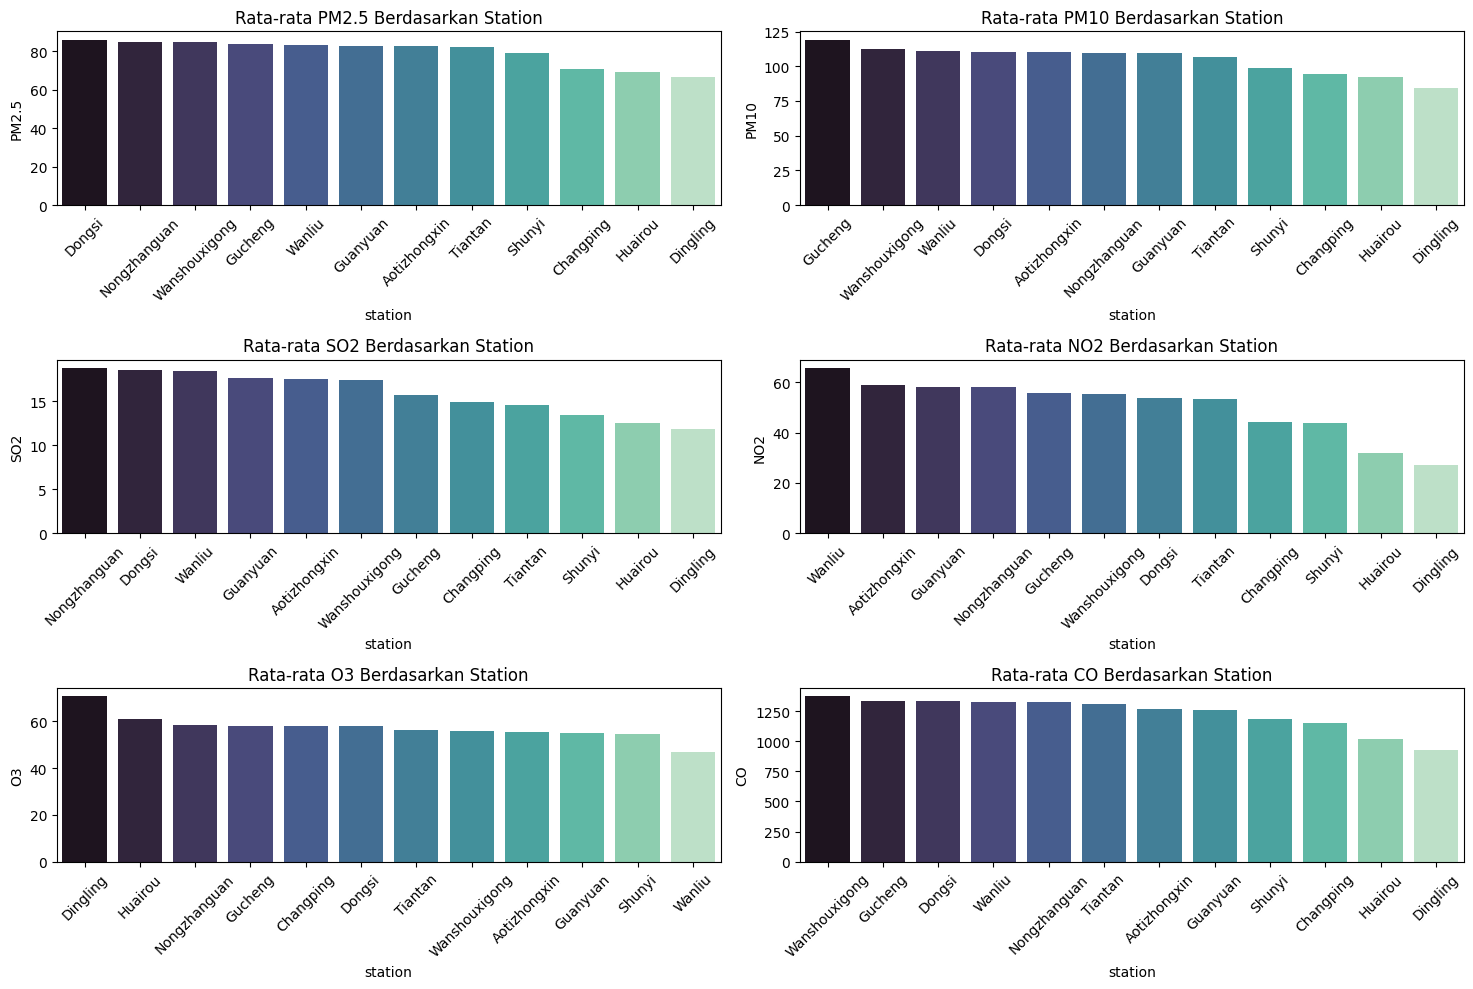

In [31]:
city = df.groupby('station')[pol_cols].mean()
city = city.reset_index()

fig, ax = plt.subplots(3, 2, figsize=(15,10))

for i, col in enumerate(city.columns[1:]):
    sorted_city = city.sort_values(col, ascending=False)

    sns.barplot(x='station', y=col, data=sorted_city, ax=ax[i//2, i%2],  palette='mako')
    ax[i//2, i%2].set_title(f'Rata-rata {col} Berdasarkan Station')
    ax[i//2, i%2].set_xticklabels(sorted_city['station'], rotation=45)

plt.tight_layout()
plt.show()

- **Dingling** lebih banyak muncul dengan konsentrasi polutan yang relatif rendah (kecuali O3), menunjukkan bahwa daerah ini mungkin memiliki kualitas udara yang lebih baik dibandingkan daerah lainnya untuk polutan seperti PM2.5, PM10, NO2, dan CO.

## Suhu dan Tekanan Udara

In [32]:
wind_col = ['TEMP', 'PRES', 'WSPM']

wind = df.groupby('year')[wind_col].mean()
wind

,TEMP,PRES,WSPM
year,,,
2013,15.692262,1007.732775,1.599598
2014,13.915396,1010.642183,1.637946
2015,13.447334,1011.114382,1.778987
2016,13.602743,1011.214866,1.856047
2017,0.445121,1021.829850,2.032405


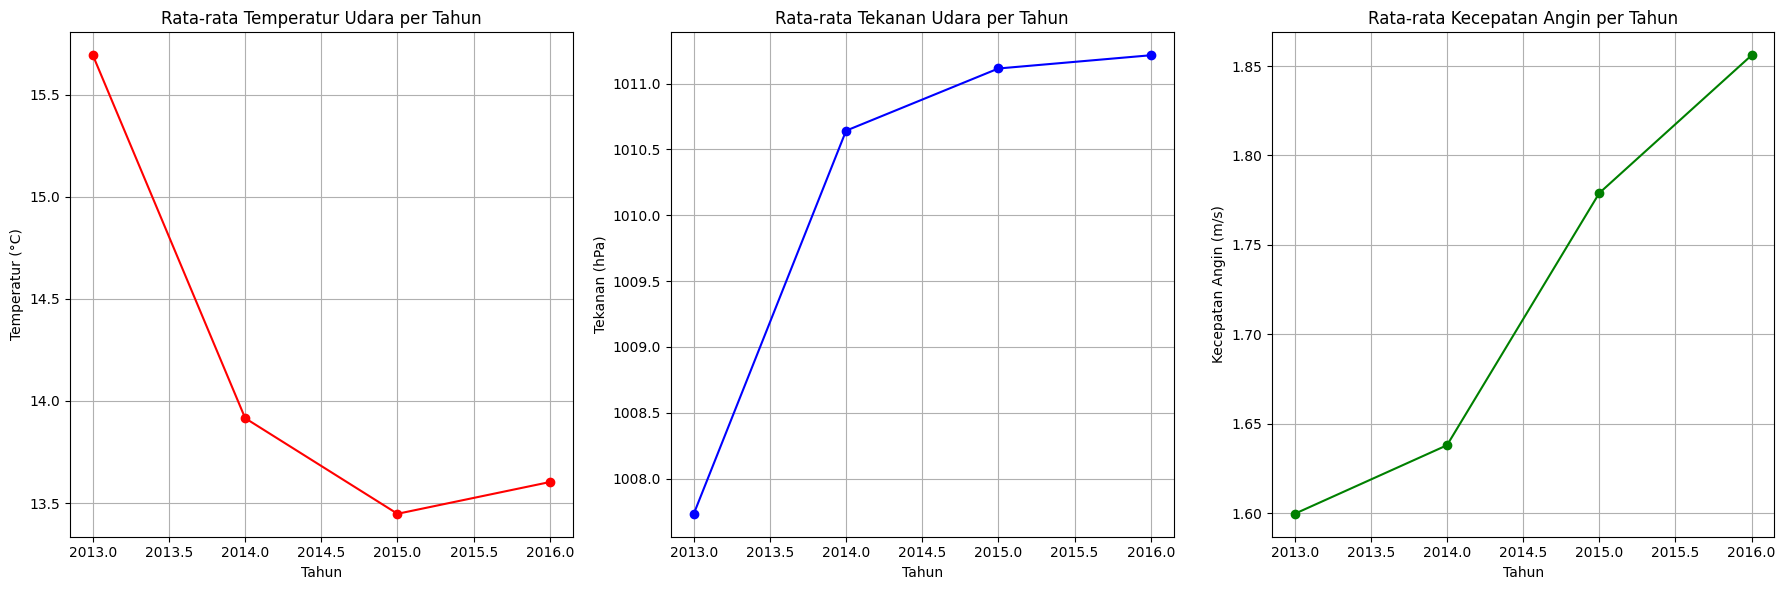

In [33]:
wind = wind.head(4)
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Subplot 1: Plot untuk Rata-rata Temperatur Udara per Tahun
ax[0].plot(wind.index, wind['TEMP'], marker='o', color='red')
ax[0].set_title('Rata-rata Temperatur Udara per Tahun')
ax[0].set_xlabel('Tahun')
ax[0].set_ylabel('Temperatur (°C)')
ax[0].grid(True)

# Subplot 2: Plot untuk Rata-rata Tekanan Udara per Tahun
ax[1].plot(wind.index, wind['PRES'], marker='o', color='blue')
ax[1].set_title('Rata-rata Tekanan Udara per Tahun')
ax[1].set_xlabel('Tahun')
ax[1].set_ylabel('Tekanan (hPa)')
ax[1].grid(True)

# Subplot 3: Plot untuk Rata-rata Kecepatan Angin per Tahun
ax[2].plot(wind.index, wind['WSPM'], marker='o', color='green')
ax[2].set_title('Rata-rata Kecepatan Angin per Tahun')
ax[2].set_xlabel('Tahun')
ax[2].set_ylabel('Kecepatan Angin (m/s)')
ax[2].grid(True)

# Tampilkan plot
plt.tight_layout()  # Mengatur jarak antar subplot
plt.show()

**Tahun 2017 tidak dihitung karena datanya hanya 2 bulan**

Temperatur udara turun signifikan dari tahun 2013 dan mencapai titik terendahnya di tahun 2015 dengan selisih yang sedikit dengan tahun 2016. <br>Sementara itu, tekanan udara dan kecepatan angin naik signifikan dengan puncaknya pada tahun 2016

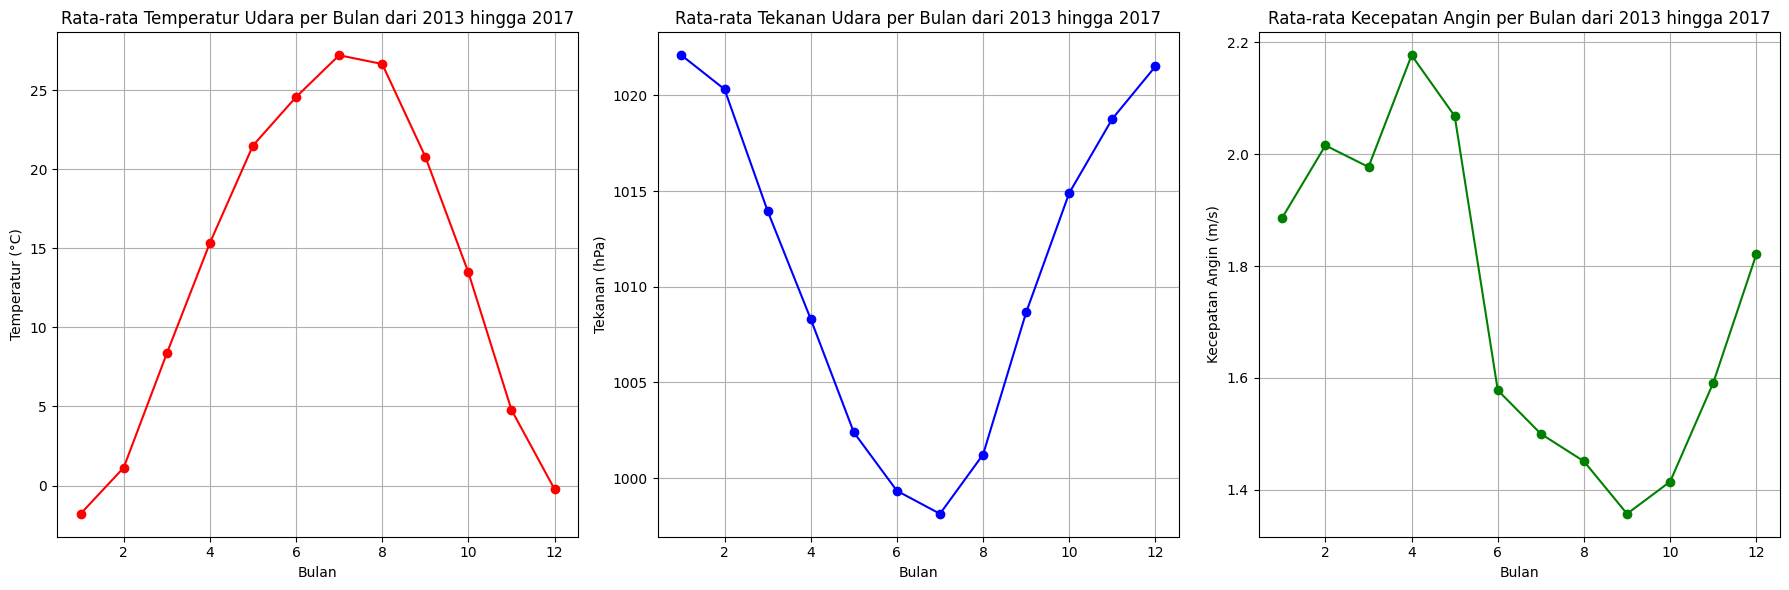

In [34]:
wind = df.groupby('month')[wind_col].mean()
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].plot(wind.index, wind['TEMP'], marker='o', color='red')
ax[0].set_title('Rata-rata Temperatur Udara per Bulan dari 2013 hingga 2017')
ax[0].set_xlabel('Bulan')
ax[0].set_ylabel('Temperatur (°C)')
ax[0].grid(True)

ax[1].plot(wind.index, wind['PRES'], marker='o', color='blue')
ax[1].set_title('Rata-rata Tekanan Udara per Bulan dari 2013 hingga 2017')
ax[1].set_xlabel('Bulan')
ax[1].set_ylabel('Tekanan (hPa)')
ax[1].grid(True)

ax[2].plot(wind.index, wind['WSPM'], marker='o', color='green')
ax[2].set_title('Rata-rata Kecepatan Angin per Bulan dari 2013 hingga 2017')
ax[2].set_xlabel('Bulan')
ax[2].set_ylabel('Kecepatan Angin (m/s)')
ax[2].grid(True)

# Tampilkan plot
plt.tight_layout() 
plt.show()

Temperatur udara dan tekanan udara menunjukkan pola yang berkebalikan. Di bulan Juli, temperatur udara mencapai titik tertinggi, sementara tekanan udara mencapai titik terendah. <br>Kecepatan angin menunjukkan pola yang berbeda dengan titik tertingginya di bulan April dan titik terendahnya di bulan September.

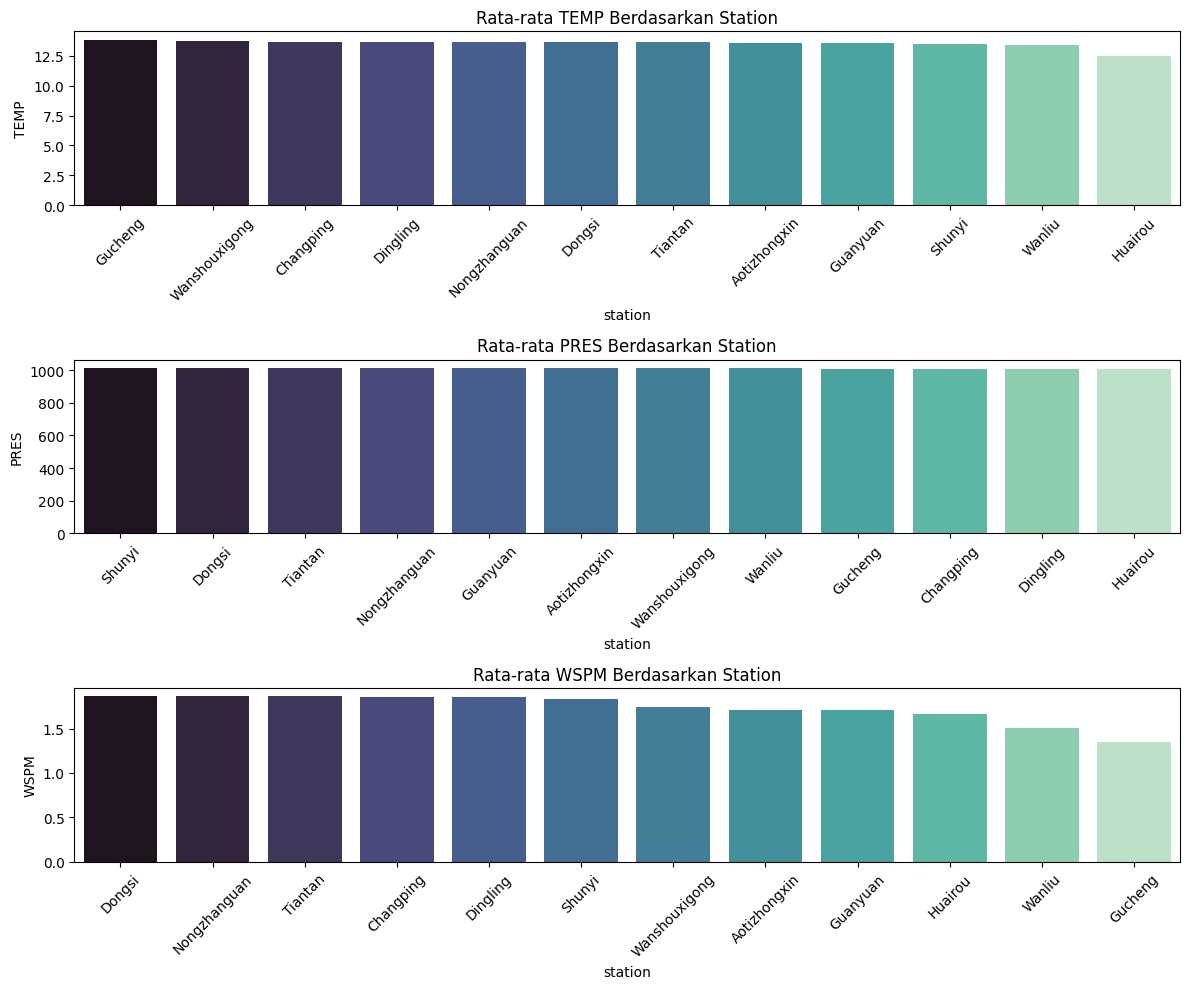

In [35]:
city = df.groupby('station')[wind_col].mean()
city = city.reset_index()

fig, ax = plt.subplots(3, 1, figsize=(12, 10))

for i, col in enumerate(city.columns[1:]):
    sorted_city = city.sort_values(col, ascending=False)

    sns.barplot(x='station', y=col, data=sorted_city, ax=ax[i],  palette='mako')
    ax[i].set_title(f'Rata-rata {col} Berdasarkan Station')
    ax[i].set_xticklabels(sorted_city['station'], rotation=45)

plt.tight_layout()
plt.show()

- Suhu dan tekanan udara di setiap stasiun tidak menunjukkan perbedaan yang ekstrim.
- Stasiun **Huairou** merupakan stasiun dengan suhu, tekanan udara, dan kecepatan angin yang lebih rendah dibanding stasiun lainnya.
- Stasiun **Gucheng** memiliki temperatur paling tinggi dibanding stasiun lainnya, tetapi juga memiliki kecepatan angin terendah.
- Stasiun dengan tekanan udara tertinggi ditempati oleh stasiun **Shunyi** yang juga memiliki suhu udara lebih rendah dibanding stasiun lain.

## Curah Hujan

c:\Users\Lutfi Kurrotaeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lutfi Kurrotaeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Lutfi Kurrotaeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Lutfi Kurrotaeni\AppDat

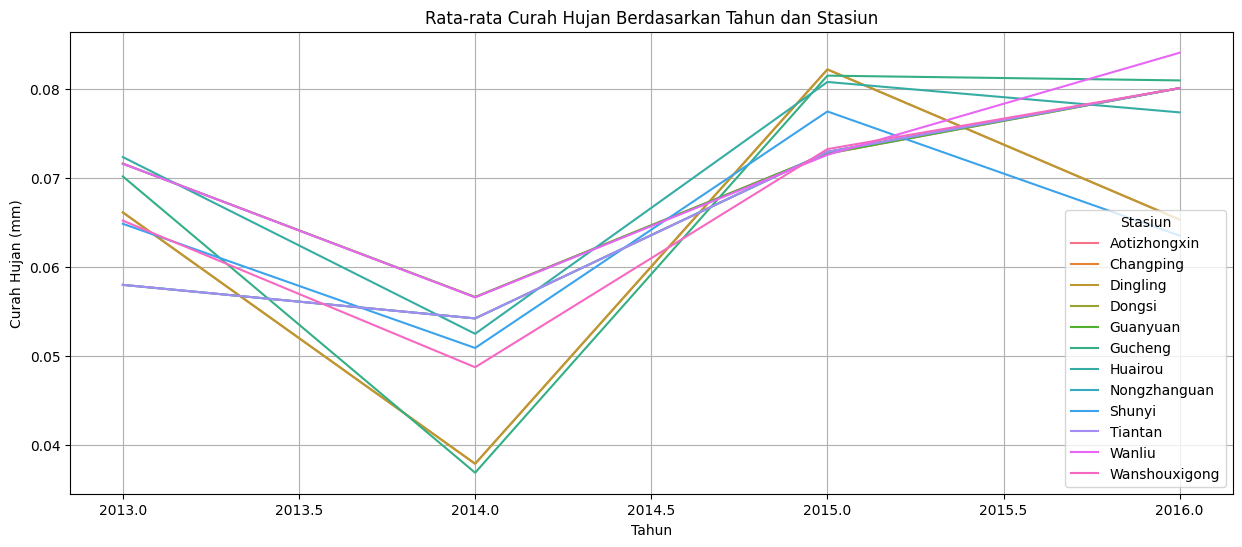

In [36]:
city_rain = df[df['year'] != 2017].groupby(['station', 'year'])['RAIN'].mean()
city_rain = city_rain.reset_index()


plt.figure(figsize=(15, 6))
sns.lineplot(data=city_rain, x='year', y='RAIN', hue='station')

plt.title('Rata-rata Curah Hujan Berdasarkan Tahun dan Stasiun')
plt.xlabel('Tahun')
plt.ylabel('Curah Hujan (mm)')
plt.grid(True)

plt.legend(title='Stasiun')
plt.show()

- Hampir semua stasiun menunjukkan penurunan curah hujan pada tahun 2014.
- Setelah penurunan yang tajam pada 2014, semua stasiun mengalami peningkatan curah hujan pada tahun 2015. Beberapa stasiun, seperti Gucheng, Changping, dan Dingling bahkan menunjukkan peningkatan yang lebih signifikan dibanding stasiun lainnya.
- Stasiun Dongsi, Tiantan, dan Nongzhanguan; Changping dan Dingling; serta Aotizhongxin, Guanyuan, dan Wanliu menunjukkan pola yang sama untuk setiap tahunnya.

In [37]:
df.groupby('station')['RAIN'].mean().reset_index().sort_values('RAIN')

,station,RAIN
1,Changping,0.060257
2,Dingling,0.060257
8,Shunyi,0.061742
3,Dongsi,0.064126
7,Nongzhanguan,0.064126
9,Tiantan,0.064126
11,Wanshouxigong,0.064345
5,Gucheng,0.064624
0,Aotizhongxin,0.067536
4,Guanyuan,0.067536


# Explanatory Analysis

In [38]:
data = df[df['year'] == 2016]

## Solution 1: Tren polusi udara di setiap kota pada tahun 2016

In [39]:
pol_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
city = data.groupby(['month', 'station'])[pol_cols].mean().reset_index()
city

,month,station,PM2.5,PM10,SO2,NO2,CO,O3
0,1,Aotizhongxin,67.665995,86.463038,22.913306,55.765457,1807.661290,32.936828
1,1,Changping,54.669583,80.829744,16.418573,55.273217,1494.885599,29.433378
2,1,Dingling,53.186406,72.213324,15.481157,29.786003,1336.137281,45.636608
3,1,Dongsi,69.353495,87.960349,19.774194,49.813172,1465.456989,28.977151
4,1,Guanyuan,67.235215,84.879704,23.456989,56.887769,1488.440860,23.145161
...,...,...,...,...,...,...,...,...
139,12,Nongzhanguan,144.929730,165.797973,19.562162,81.532432,2647.094595,18.614189
140,12,Shunyi,113.231760,124.640916,19.672389,67.244635,2293.419170,24.281116
141,12,Tiantan,143.316216,178.621622,10.377027,84.537838,2555.405405,13.926351
142,12,Wanliu,126.617687,147.019048,20.265986,91.240136,2868.367347,16.687755


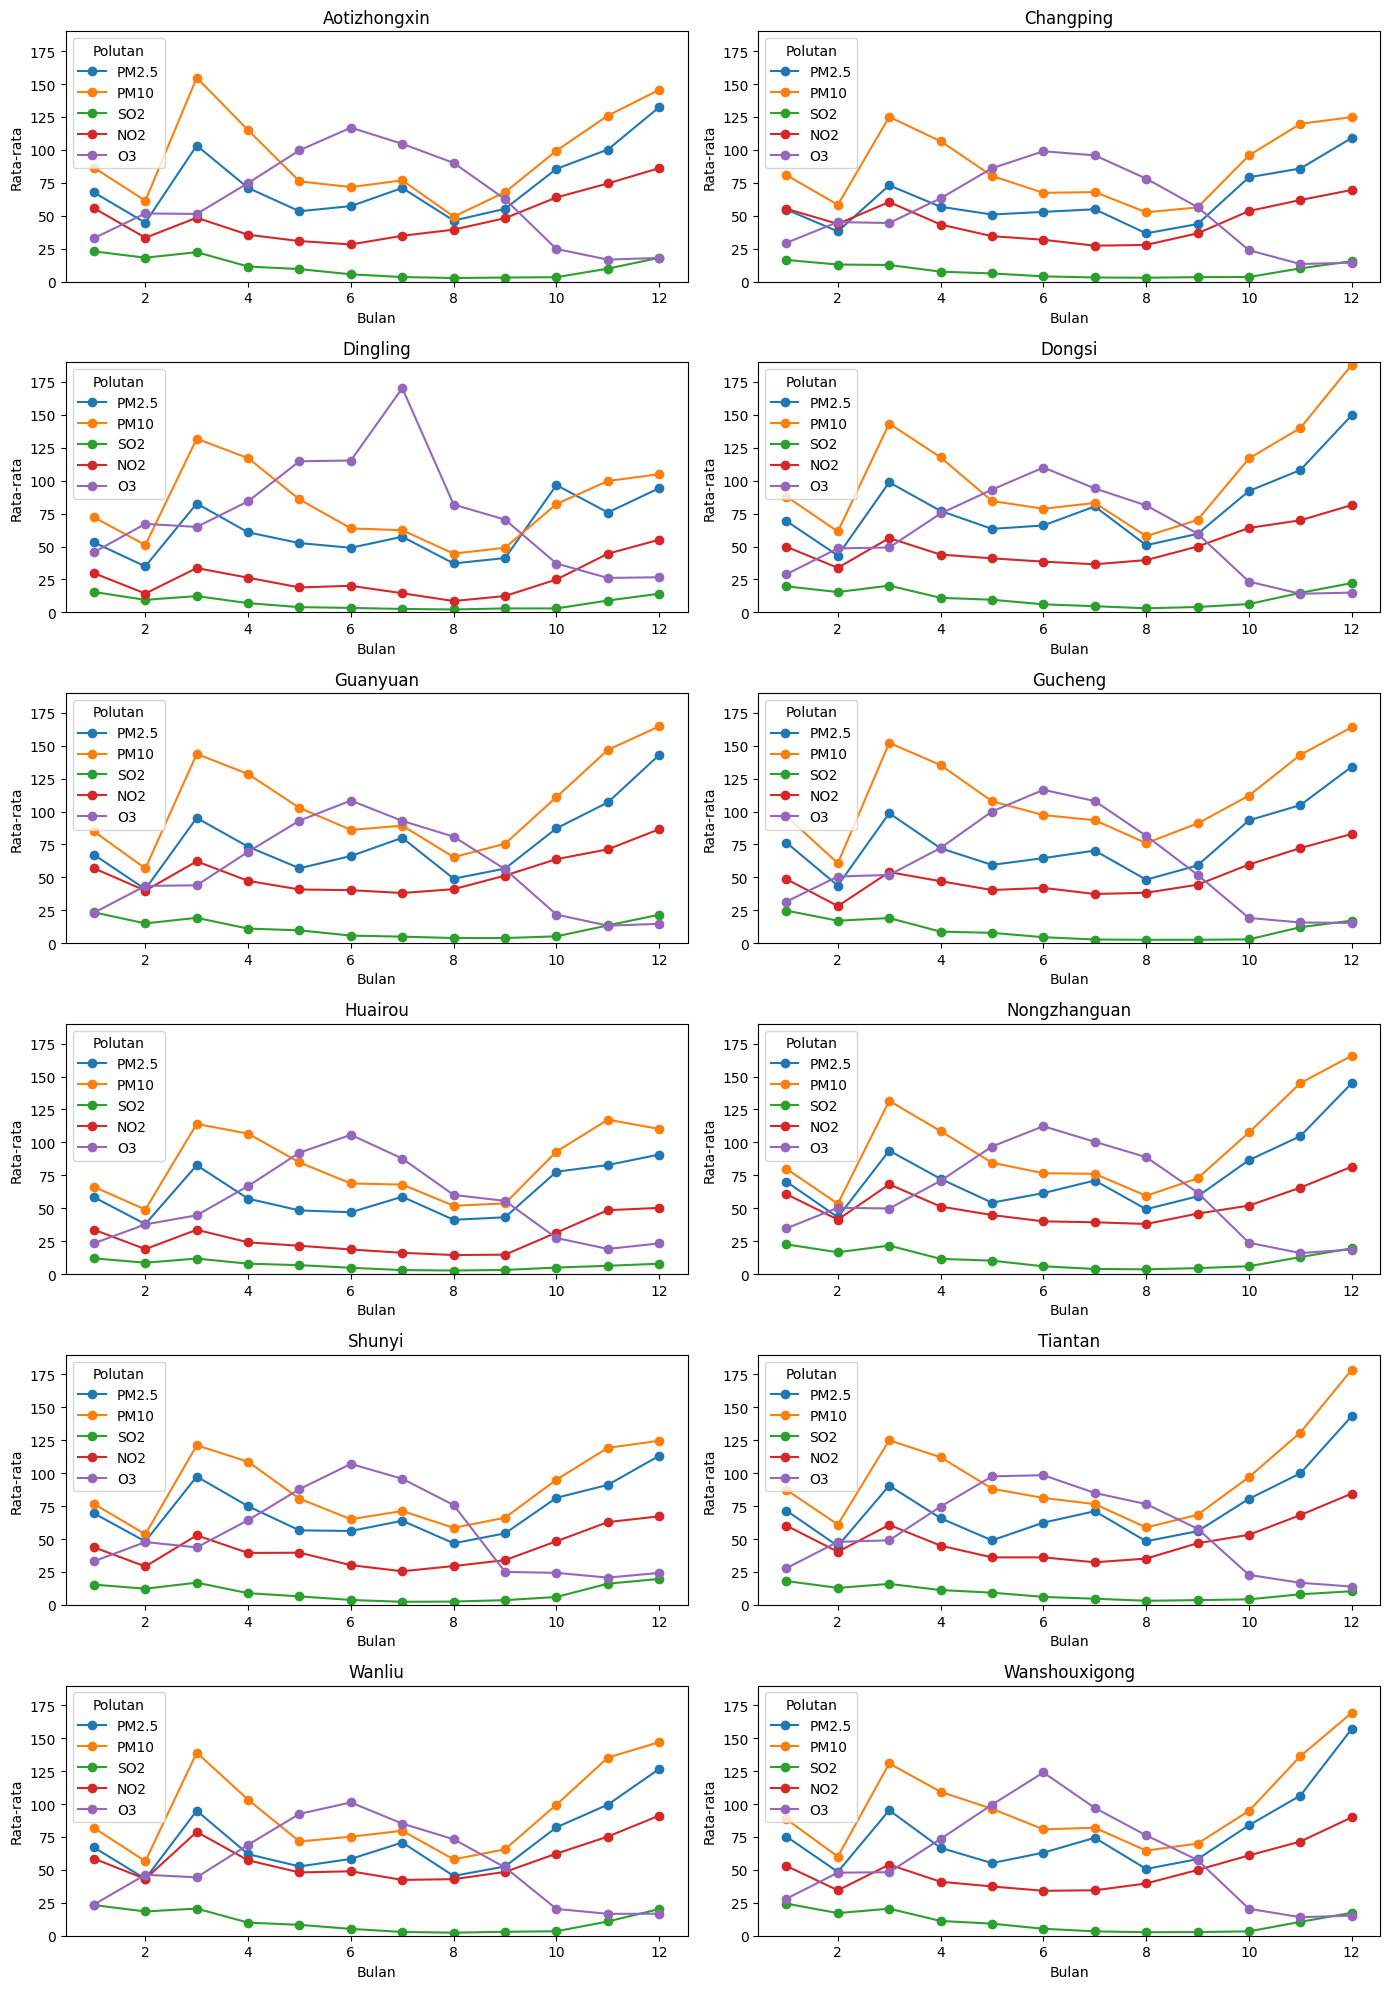

In [40]:
fig, ax = plt.subplots(6, 2, figsize=(14, 20)) 

for i, station in enumerate(city['station'].unique()):
    station_data = city[city['station'] == station].drop(columns=['station', 'CO'])

    for col in station_data.columns[1:]:
        ax[i//2, i%2].plot(station_data['month'], station_data[col], marker='o', label=col)

    ax[i//2, i%2].set_title(station)
    ax[i//2, i%2].set_xlabel('Bulan')
    ax[i//2, i%2].set_ylabel('Rata-rata')
    ax[i//2, i%2].set_ylim([0, 190])

    ax[i//2, i%2].legend(title='Polutan')

plt.tight_layout()
plt.show()

- Terjadi penurunan konsentrasi semua polutan kecuali O3 pada bulan Februari. Setelah itu, konsentrasi meningkat kembali pada bulan Maret.
- Konsentrasi PM dan NO mencapai puncaknya di akhir tahun, khususnya bulan Desember hampir di semua kota. Selain itu, PM dan NO cenderung memiliki pola yang sama.
- Konsentrasi O3 di setiap kota mencapai puncaknya di pertengahan tahun, yaitu bulan Juni atau Juli. Pola ini konsisten naik dari awal tahun hingga puncak di pertengahan tahun dan kemudian turun kembali hingga akhir tahun.
- Di kota Dingling, terjadi kenaikan konsentrasi O3 yang ekstrim pada bulan Juli, berbeda dengan kota-kota lainnya yang cenderung mencapai puncak pada bulan Juni. 
- Polutan PM2.5 tertinggi tercatat di kota Wanshouxigong sebesar 156.95 &micro;g/m<sup>3</sup> pada bulan Desember, sementara terendah di kota Dingling sebesar 35.36 &micro;g/m<sup>3</sup> pada bulan Februari.
- Konsentrasi PM10 tertinggi ada di kota Dongsi sebesar 188.04 &micro;g/m<sup>3</sup> pada bulan Desember, dan terendah di Dingling sebesar 44.63 &micro;g/m<sup>3</sup> pada bulan Agustus.
- Konsentrasi SO2 tertinggi terjadi di kota Gucheng pada bulan Januari sebesar 24.78 &micro;g/m<sup>3</sup>, sedangkan konsentrasi terendah tercatat di Dingling sebesar 2.21 &micro;g/m<sup>3</sup> pada bulan Agustus.
- Polutan NO2 tertinggi tercatat di Wanliu sebesar 91.26 &micro;g/m<sup>3</sup> pada bulan Desember, sedangkan terendah di Dingling sebesar 8.60 &micro;g/m<sup>3</sup> pada bulan Agustus.
- Konsentrasi O3 tertinggi berada di Dingling sebesar 170.29 &micro;g/m<sup>3</sup> pada bulan Juli, sementara yang terendah di Changping sebesar 13.28 &micro;g/m<sup>3</sup> pada bulan November.

In [41]:
for col in pol_cols[:-1]:
    city_max = city[city[col] == city[col].max()]
    city_min = city[city[col] == city[col].min()]

    city_pol_max = city_max['station'].values[0]
    city_pol_min = city_min['station'].values[0]

    pol_max_value = city_max[col].values[0]
    pol_min_value = city_min[col].values[0]

    month_max = city_max['month'].values[0]
    mont_min = city_min['month'].values[0]

    print(f'Polutan {col} tertinggi ada di kota {city_pol_max} sebesar {pol_max_value:.2f} pada bulan {month_max} dan terendah di kota {city_pol_min} pada bulan {mont_min} sebesar {pol_min_value:.2f}')

Polutan PM2.5 tertinggi ada di kota Wanshouxigong sebesar 157.04 pada bulan 12 dan terendah di kota Dingling pada bulan 2 sebesar 34.89
Polutan PM10 tertinggi ada di kota Dongsi sebesar 188.03 pada bulan 12 dan terendah di kota Dingling pada bulan 8 sebesar 44.62
Polutan SO2 tertinggi ada di kota Gucheng sebesar 24.78 pada bulan 1 dan terendah di kota Dingling pada bulan 8 sebesar 2.21
Polutan NO2 tertinggi ada di kota Wanliu sebesar 91.24 pada bulan 12 dan terendah di kota Dingling pada bulan 8 sebesar 8.61
Polutan CO tertinggi ada di kota Wanliu sebesar 2868.37 pada bulan 12 dan terendah di kota Dingling pada bulan 9 sebesar 441.56


In [42]:
city = data.groupby(['month', 'station'])['CO'].mean().reset_index()
city

,month,station,CO
0,1,Aotizhongxin,1807.661290
1,1,Changping,1494.885599
2,1,Dingling,1336.137281
3,1,Dongsi,1465.456989
4,1,Guanyuan,1488.440860
...,...,...,...
139,12,Nongzhanguan,2647.094595
140,12,Shunyi,2293.419170
141,12,Tiantan,2555.405405
142,12,Wanliu,2868.367347


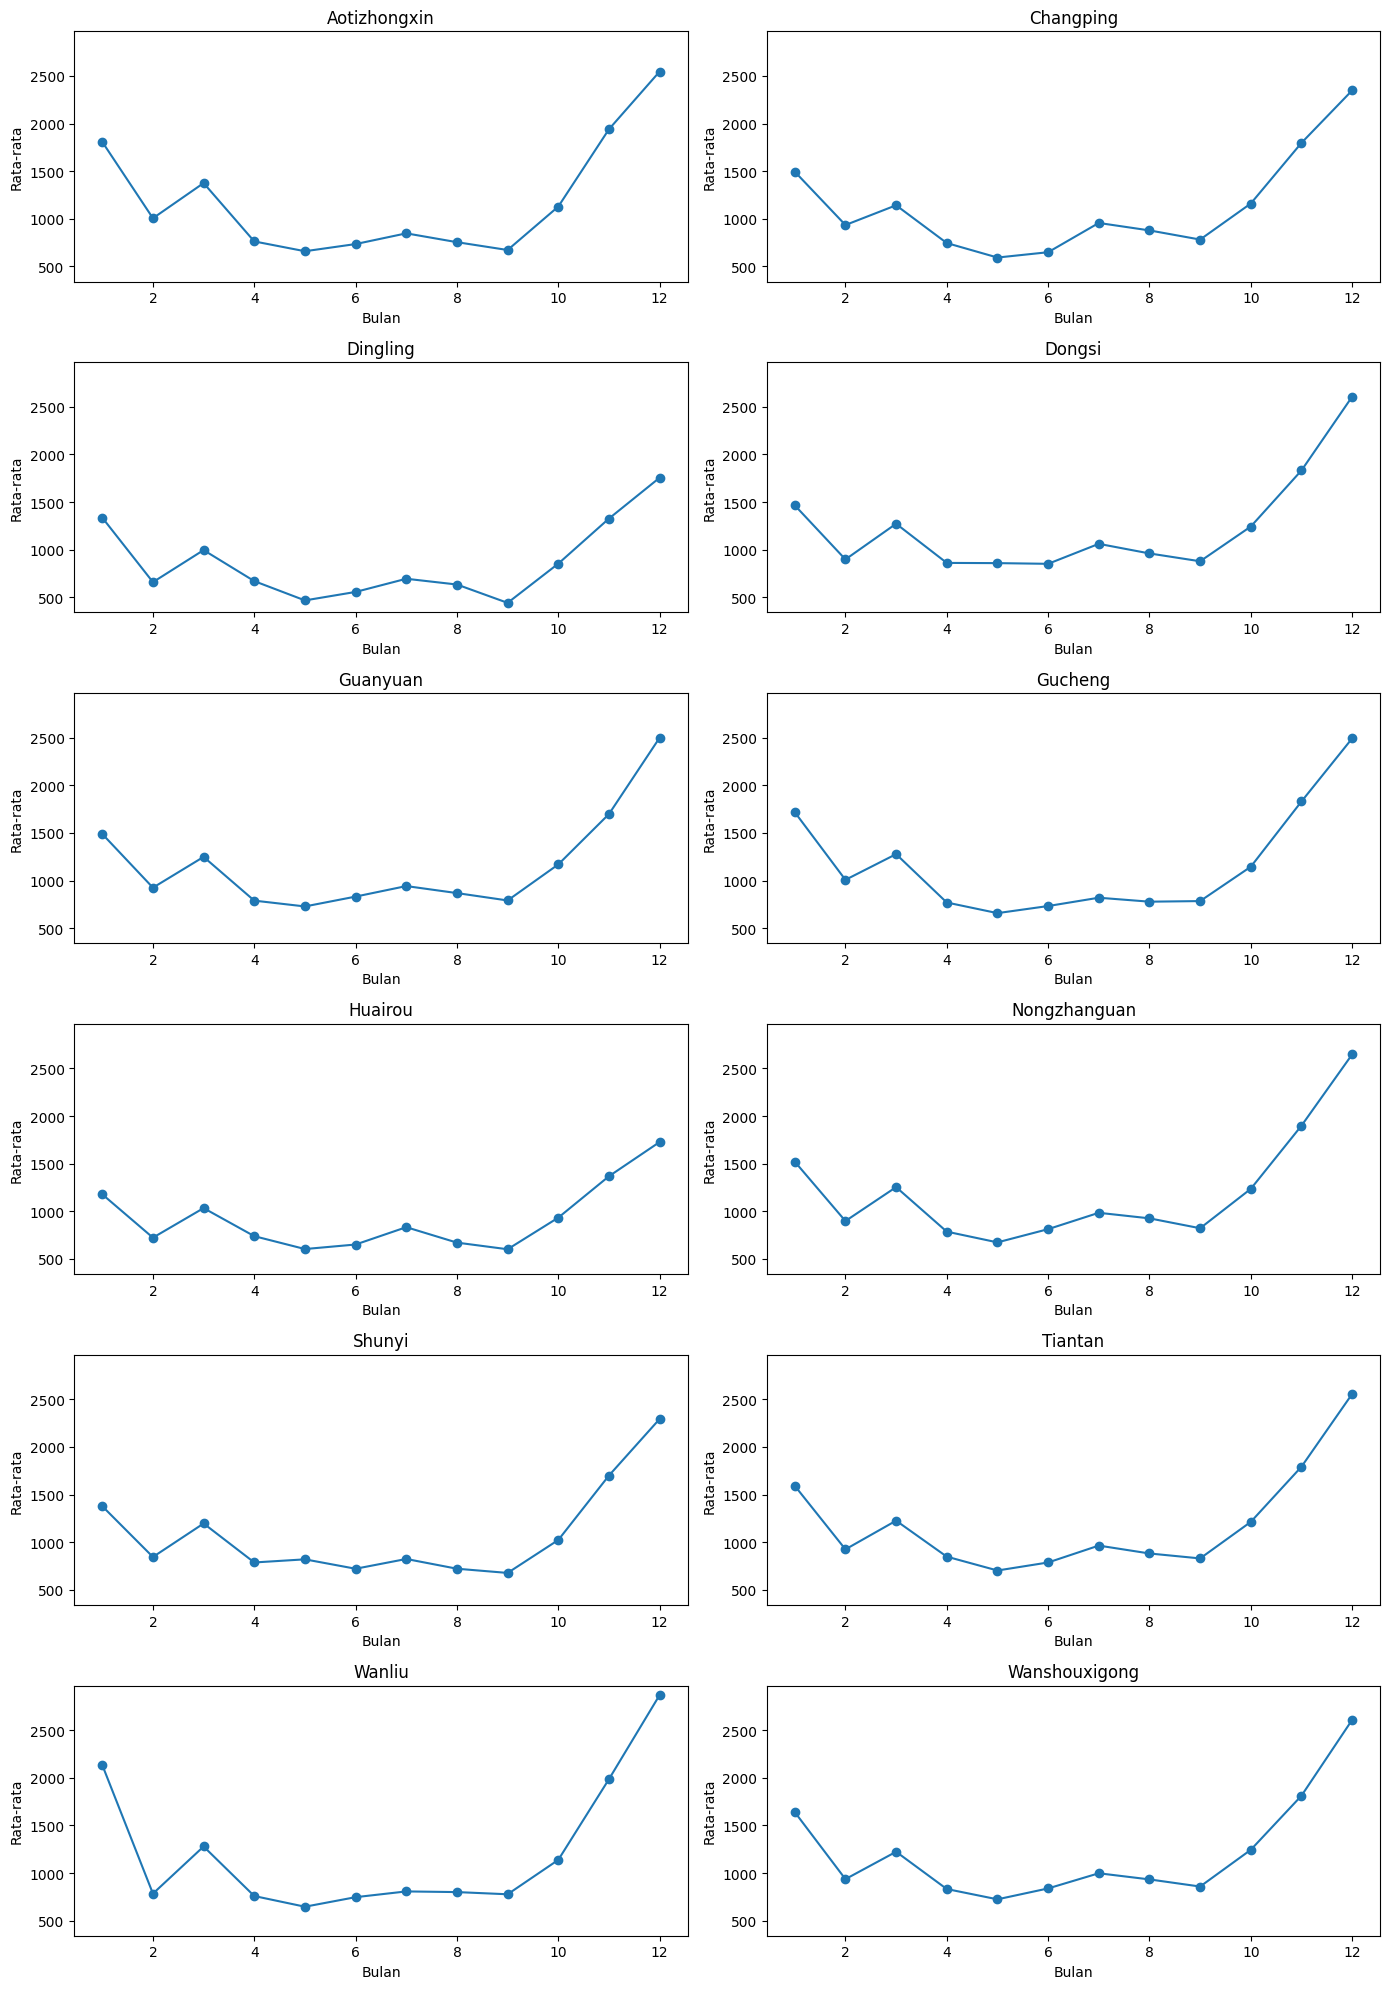

In [43]:
fig, ax = plt.subplots(6, 2, figsize=(14, 20))
co_min = city['CO'].min() 
co_max = city['CO'].max() 

for i, station in enumerate(city['station'].unique()):
    station_data = city[city['station'] == station].drop(columns=['station'])

    ax[i//2, i%2].plot(station_data['month'], station_data['CO'], marker='o', label='CO')

    ax[i//2, i%2].set_title(station)
    ax[i//2, i%2].set_xlabel('Bulan')
    ax[i//2, i%2].set_ylabel('Rata-rata')
    ax[i//2, i%2].set_ylim([co_min - 100, co_max + 100])

plt.tight_layout()
plt.show()

- Konsentrasi CO naik signifikan di semua kota dari bulan September hingga Desember.
- Konsentrasi CO cenderung memiliki pola yang sama di setiap kota.
- Konsentrasi CO tertinggi terjadi di kota Wanliu pada bulan Desember dengan nilai mencapai 2878.96, sedangkan konsentrasi terendah di kota Dingling dengan nilai 450.14

In [44]:
aqi = data.groupby(['month', 'station'])['PM2.5'].mean().reset_index()
aqi['AQI'] = aqi['PM2.5'].apply(AQI)
aqi = aqi.drop(columns='PM2.5')
aqi

,month,station,AQI
0,1,Aotizhongxin,Unhealthy
1,1,Changping,Unhealthy for Sensitive Groups
2,1,Dingling,Unhealthy for Sensitive Groups
3,1,Dongsi,Unhealthy
4,1,Guanyuan,Unhealthy
...,...,...,...
139,12,Nongzhanguan,Very Unhealthy
140,12,Shunyi,Unhealthy
141,12,Tiantan,Very Unhealthy
142,12,Wanliu,Very Unhealthy


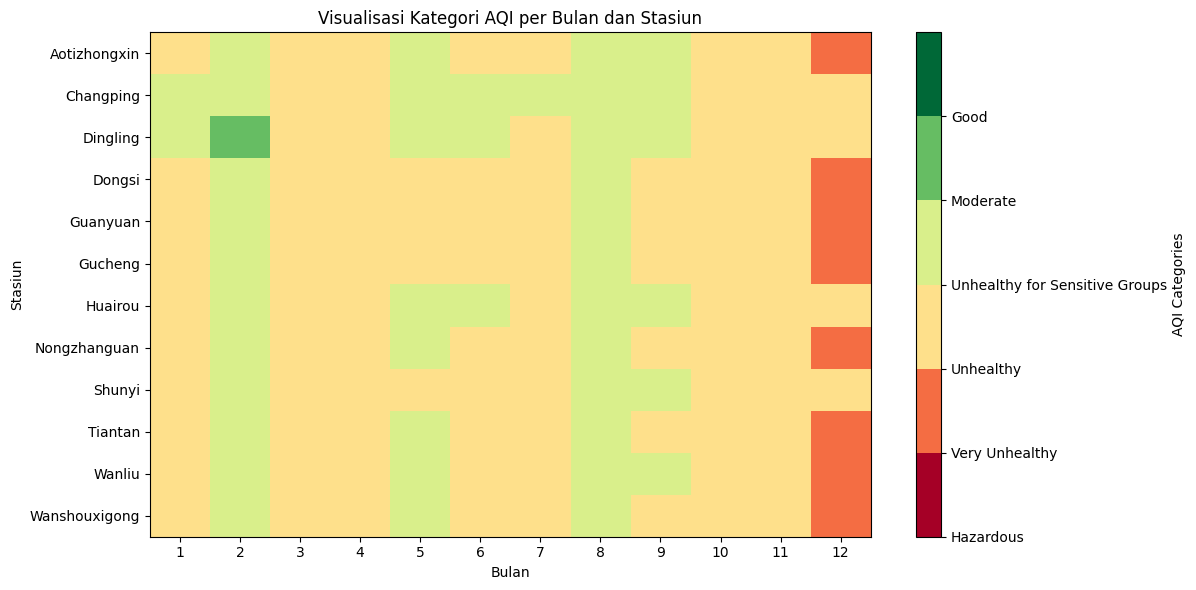

In [45]:
# Menentukan mapping untuk AQI ke nilai numerik
aqi_mapping = {
    'Good': 5,
    'Moderate': 4,
    'Unhealthy for Sensitive Groups': 3,
    'Unhealthy': 2,
    'Very Unhealthy': 1,
    'Hazardous': 0
}

# Mengonversi kategori AQI ke nilai numerik
aqi['AQI_value'] = aqi['AQI'].map(aqi_mapping)

# Membuat grid untuk AQI values
stations = aqi['station'].unique()
months = aqi['month'].unique()
grid = np.zeros((len(stations), len(months)))  

for i, station in enumerate(stations):  
    for j, month in enumerate(months):
        value = aqi[(aqi['station'] == station) & (aqi['month'] == month)]['AQI_value']
        grid[i, j] = value.iloc[0] if not value.empty else -1 

# Membuat visualisasi
plt.figure(figsize=(12, 6))
cmap = plt.get_cmap('RdYlGn', 6)

# Menampilkan grid menggunakan imshow
cax = plt.imshow(grid, aspect='auto', cmap=cmap, vmin=0, vmax=6)

# Menambahkan label
plt.xticks(ticks=np.arange(len(months)), labels=months)
plt.yticks(ticks=np.arange(len(stations)), labels=stations)
plt.colorbar(cax, ticks=[0, 1, 2, 3, 4, 5],
             label='AQI Categories', 
             format=plt.FuncFormatter(lambda x, _: list(aqi_mapping.keys())[5-int(x)]))

# Menampilkan visualisasi
plt.title('Visualisasi Kategori AQI per Bulan dan Stasiun')
plt.xlabel('Bulan')
plt.ylabel('Stasiun')
plt.tight_layout()
plt.show()

Secara keseluruhan, polusi udara di China tidak sehat, tetapi tidak sampai kategori Hazardous (berbahaya). Kondisi terparah terjadi pada bulan Desember karena banyak wilayah dengan kualitas udara tidak sehat untuk semua orang. Kondisi yang dikategorikan moderate hanya ada pada bulan Februari di Dingling.

## Solution 2: Tren suhu dan tekanan udara pada tahun 2016 serta persebaran arah angin

In [46]:
wind_col = ['TEMP', 'PRES', 'WSPM']
wind = data.groupby(['month', 'station'])[wind_col].mean().reset_index()
wind

,month,station,TEMP,PRES,WSPM
0,1,Aotizhongxin,-4.550000,1025.950000,2.115054
1,1,Changping,-4.154509,1020.839300,2.675908
2,1,Dingling,-4.154509,1020.839300,2.675908
3,1,Dongsi,-4.550000,1025.950000,2.115054
4,1,Guanyuan,-4.550000,1025.950000,2.115054
...,...,...,...,...,...
139,12,Nongzhanguan,0.655000,1023.474054,1.443108
140,12,Shunyi,-0.150358,1024.319027,1.552504
141,12,Tiantan,0.655000,1023.474054,1.443108
142,12,Wanliu,0.091020,1021.830748,1.297279


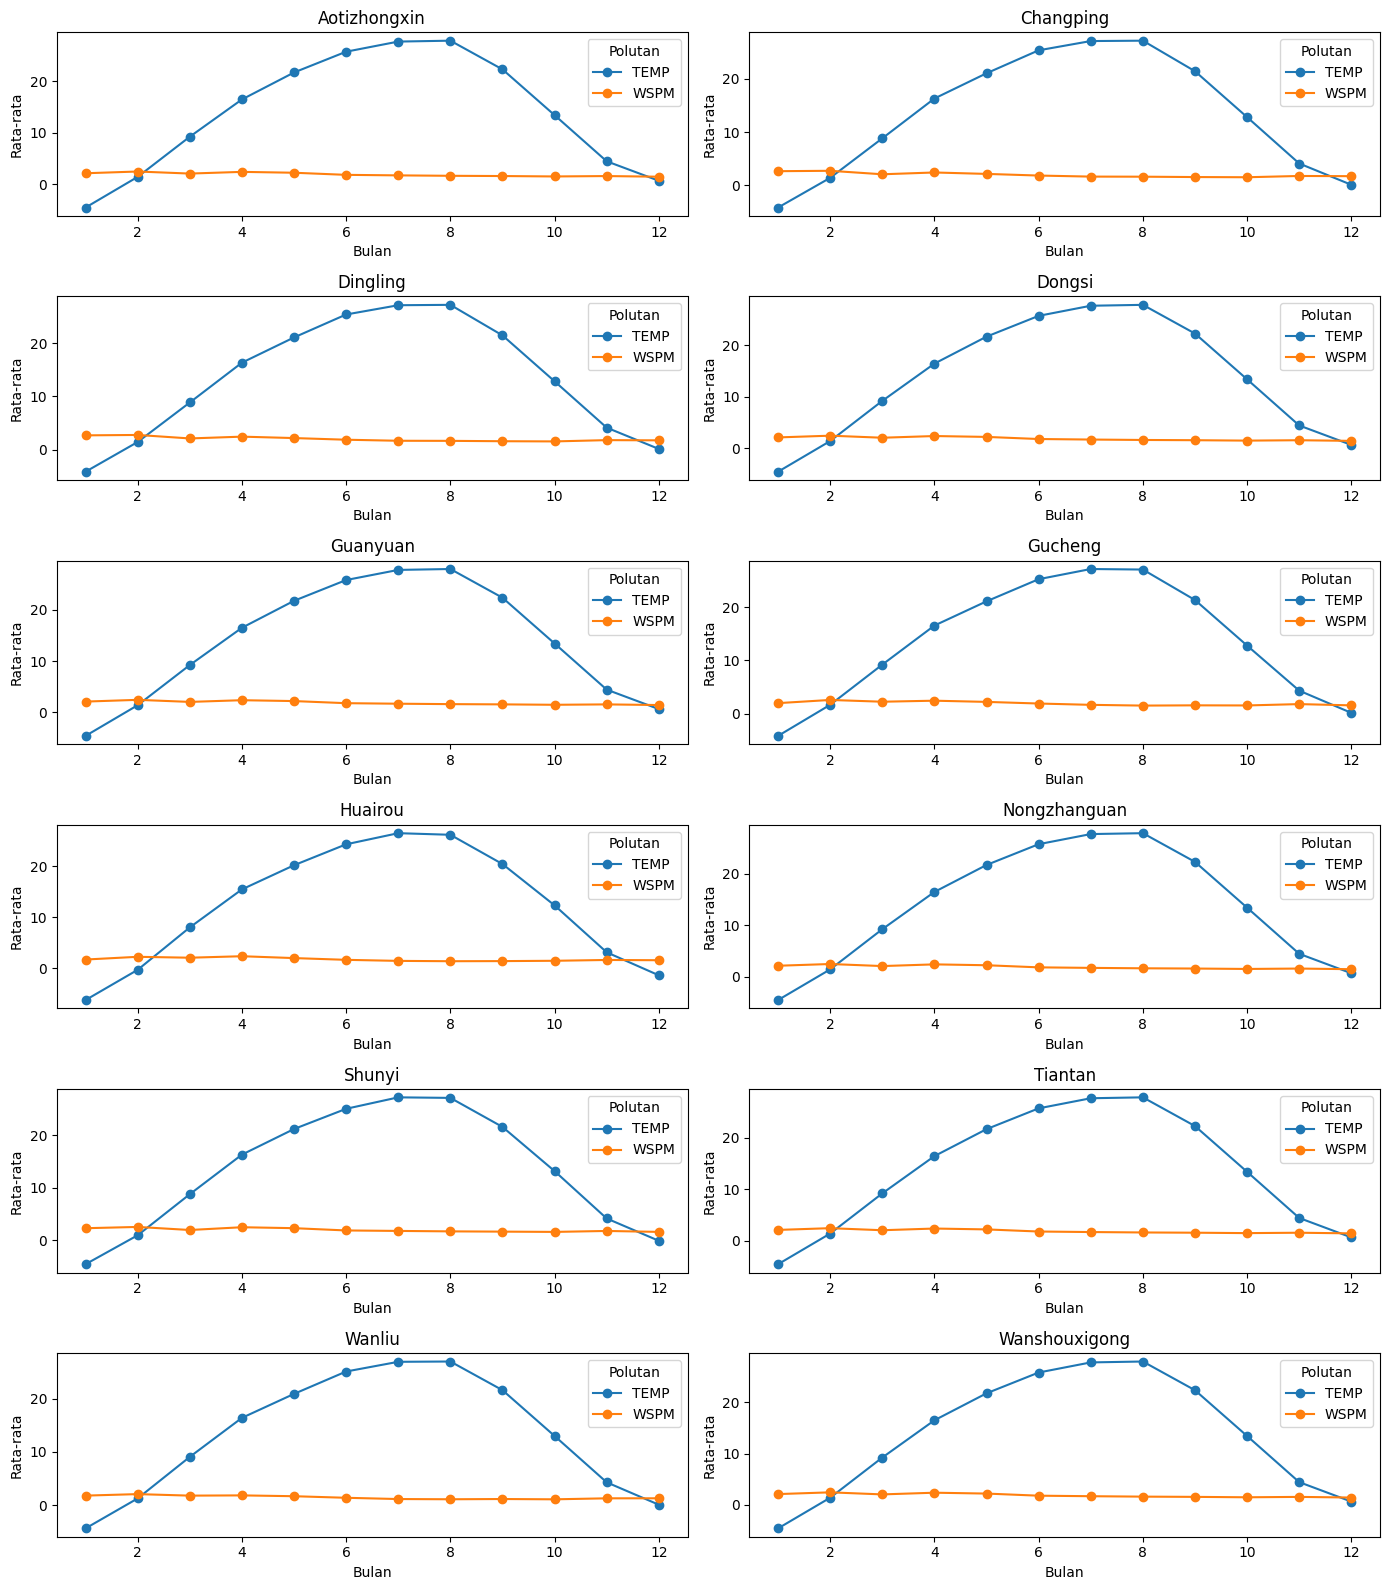

In [47]:
fig, ax = plt.subplots(6, 2, figsize=(14, 16)) 

for i, station in enumerate(wind['station'].unique()):
    station_data = wind[wind['station'] == station].drop(columns=['station', 'PRES'])

    for col in station_data.columns[1:]:
        ax[i//2, i%2].plot(station_data['month'], station_data[col], marker='o', label=col)

    ax[i//2, i%2].set_title(station)
    ax[i//2, i%2].set_xlabel('Bulan')
    ax[i//2, i%2].set_ylabel('Rata-rata')

    ax[i//2, i%2].legend(title='Polutan')

plt.tight_layout()
plt.show()

Secara keseluruhan, temperatur dan kecepatan angin memiliki pola yang sama di setiap kotanya. Temperatur terendah konsisten di bulan Januari dan puncaknya di bulan Juli-Agustus.

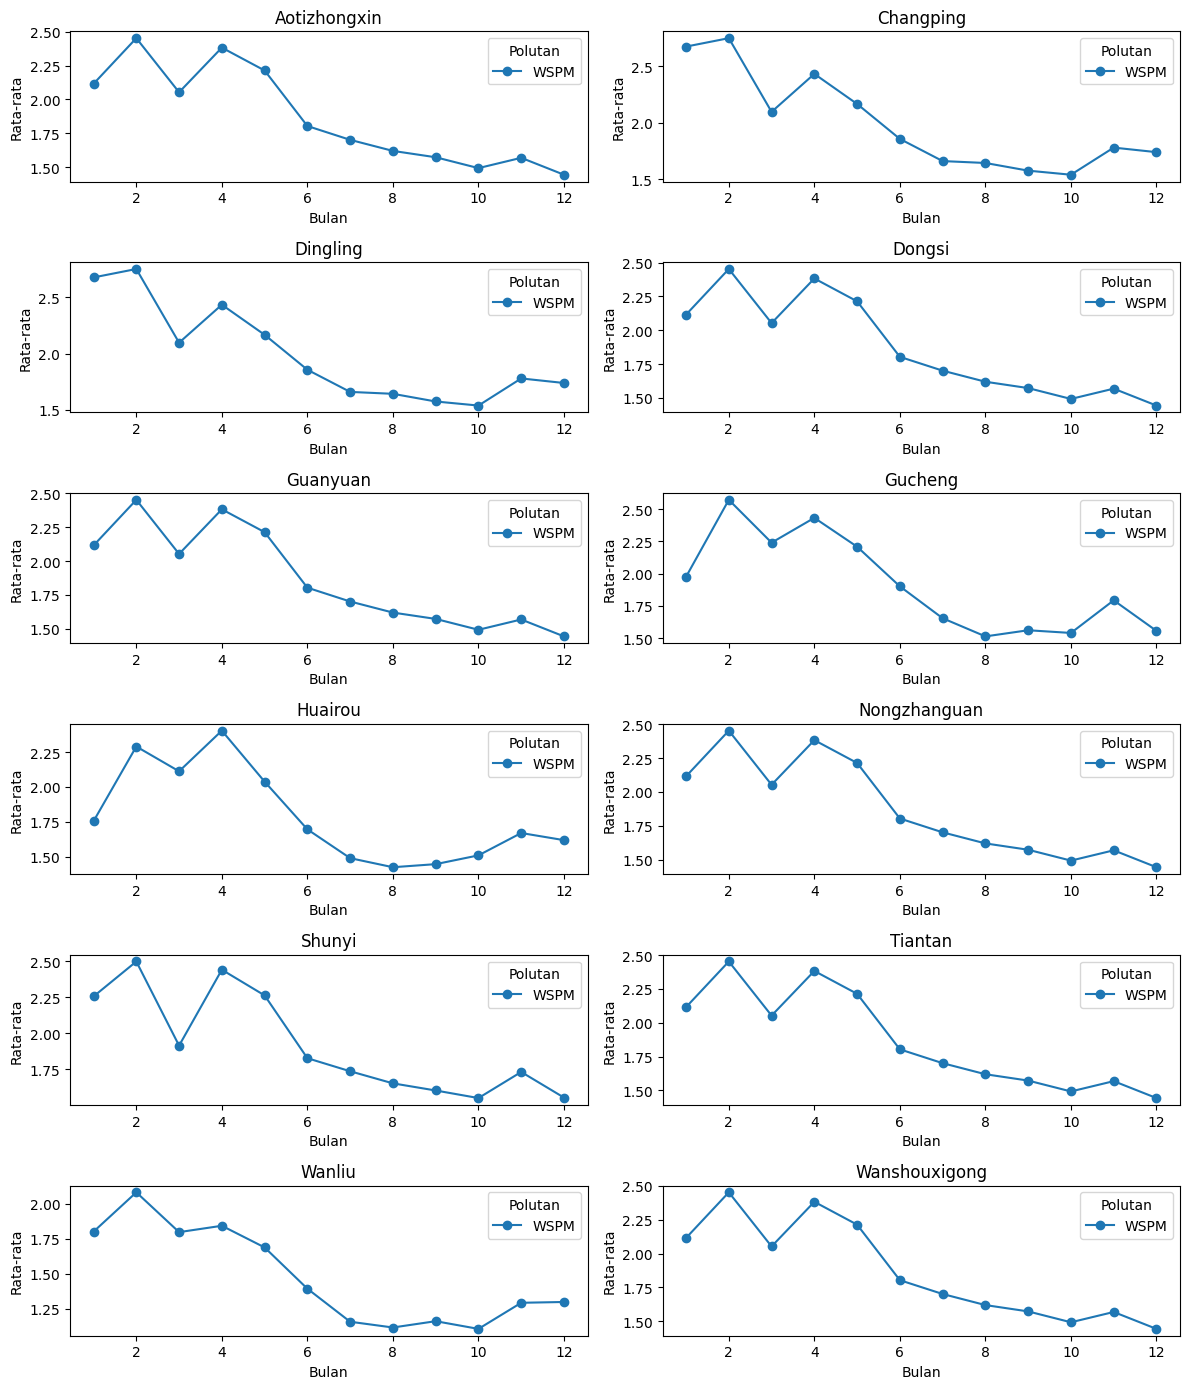

In [48]:
fig, ax = plt.subplots(6, 2, figsize=(12, 14)) 

for i, station in enumerate(wind['station'].unique()):
    station_data = wind[wind['station'] == station].drop(columns=['station', 'PRES', 'TEMP'])

    for col in station_data.columns[1:]:
        ax[i//2, i%2].plot(station_data['month'], station_data[col], marker='o', label=col)

    ax[i//2, i%2].set_title(station)
    ax[i//2, i%2].set_xlabel('Bulan')
    ax[i//2, i%2].set_ylabel('Rata-rata')

    ax[i//2, i%2].legend(title='Polutan')

plt.tight_layout()
plt.show()

Kecepatan angin di setiap kota juga menunjukkan pola yang sama. Namun, terdapat penurunan kecepatan di bulan Maret yang kemudian naik kembali di bulan April. Dari bulan April hingga Oktober, kecepatan angin terus turun hampir di semua kotanya.

In [6]:
wd = data.groupby(['station', 'wd'])['No'].count().reset_index()
wd

,station,wd,No
0,Aotizhongxin,E,2608
1,Aotizhongxin,ENE,3950
2,Aotizhongxin,ESE,1717
3,Aotizhongxin,N,2066
4,Aotizhongxin,NE,5140
...,...,...,...
187,Wanshouxigong,SSW,2457
188,Wanshouxigong,SW,3428
189,Wanshouxigong,W,2464
190,Wanshouxigong,WNW,2565


C:\Users\Lutfi Kurrotaeni\AppData\Local\Temp\ipykernel_22572\2234206311.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['wd'] = pd.Categorical(group['wd'], categories=direction_order, ordered=True)


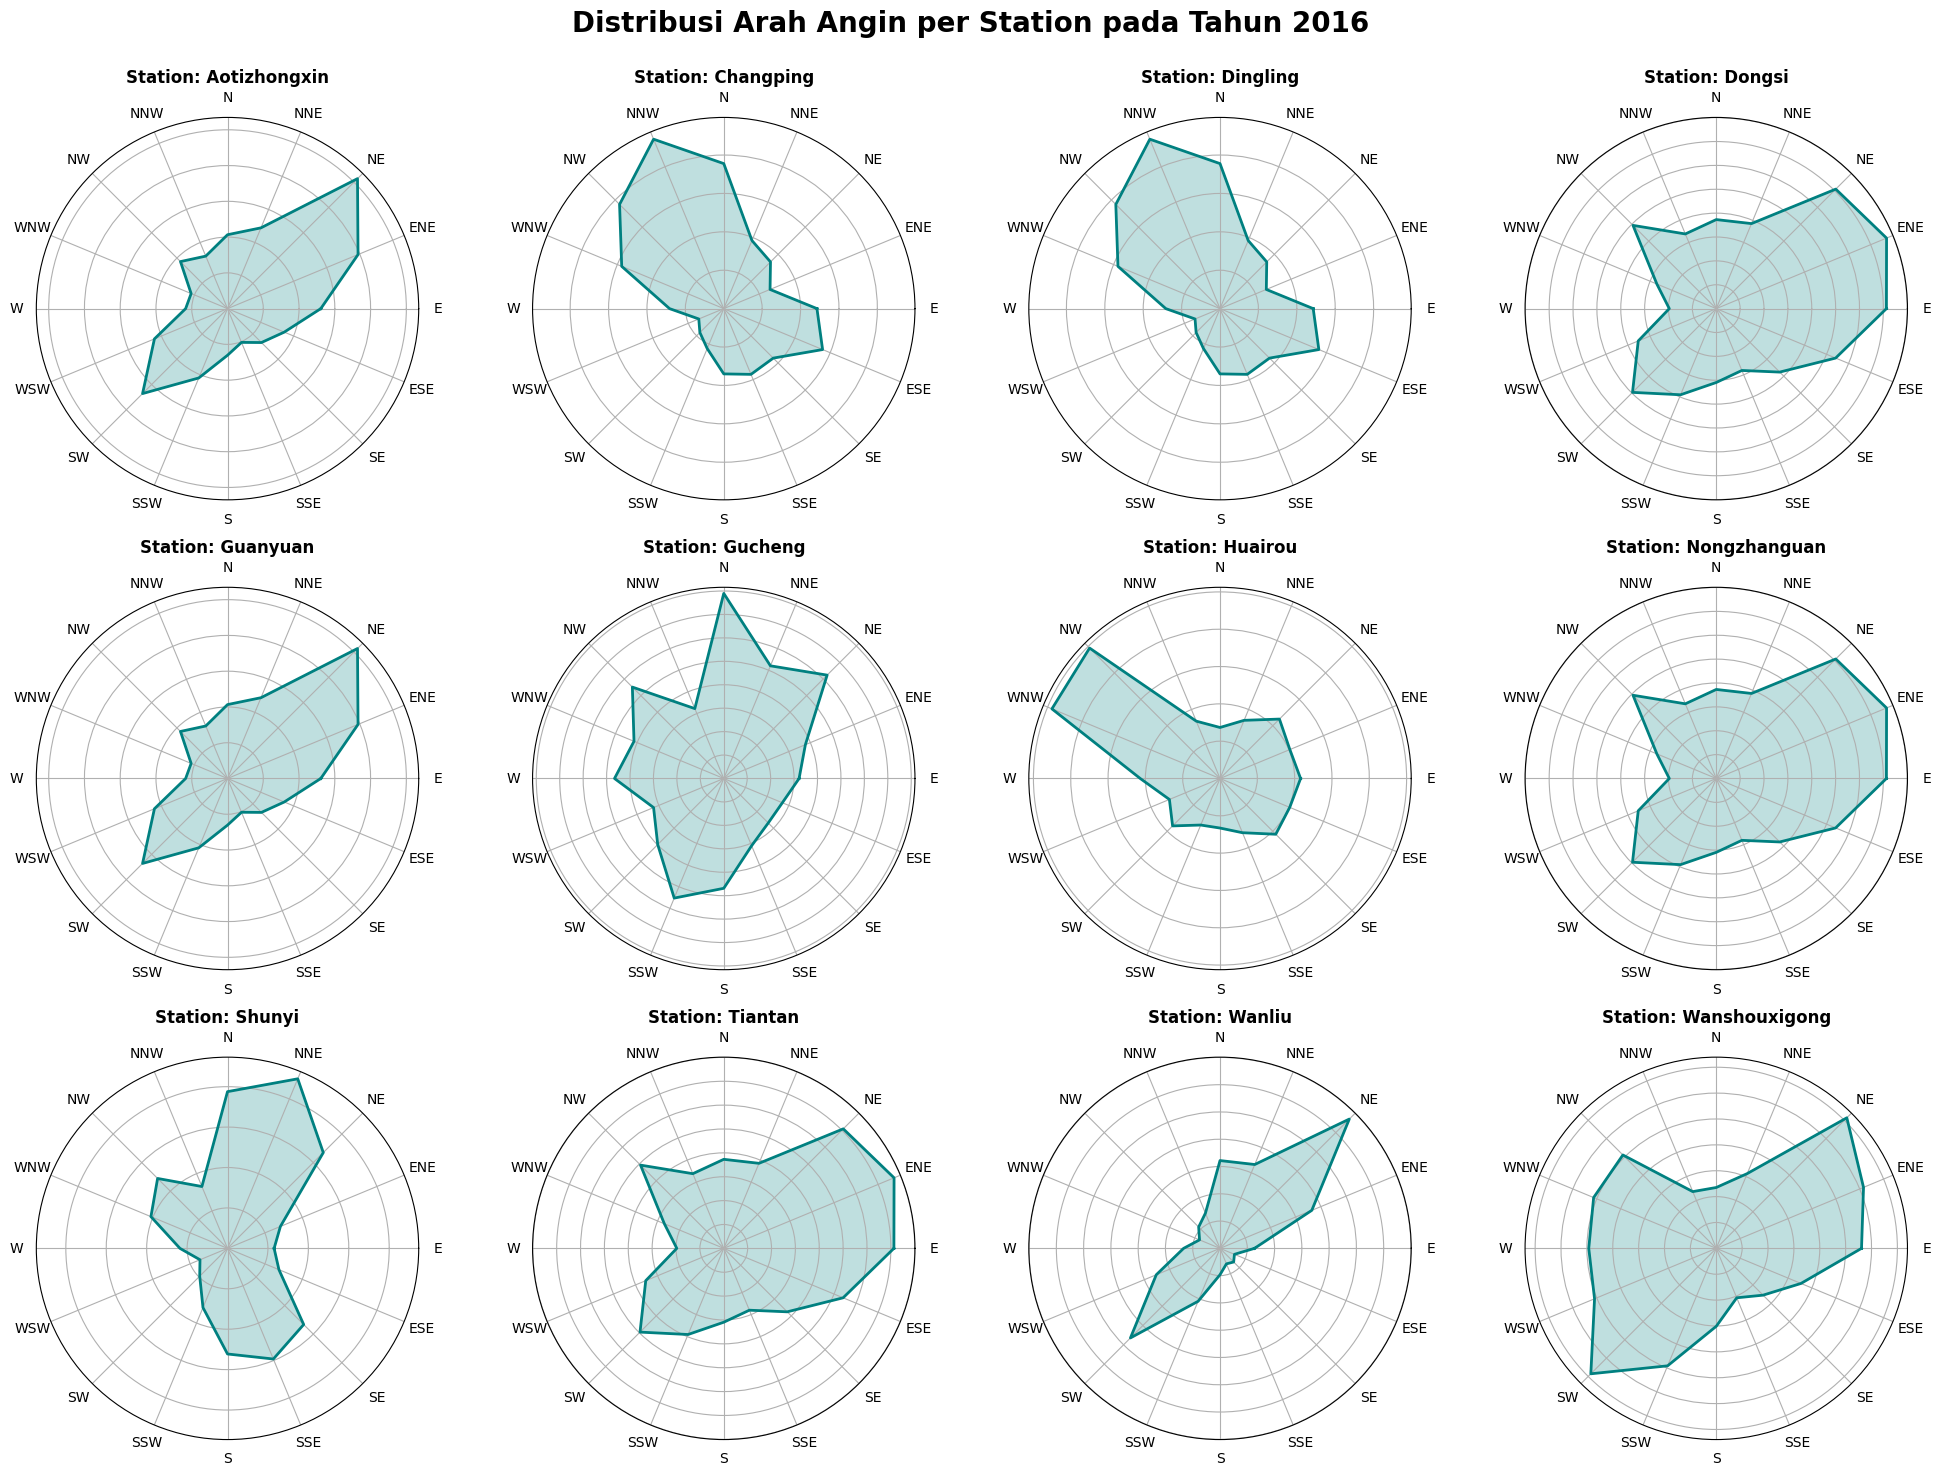

In [9]:
direction_order = ['E', 'ENE', 'NE', 'NNE', 'N', 'NNW', 'NW', 'WNW', 'W', 'WSW', 'SW', 'SSW', 'S', 'SSE', 'SE', 'ESE']

fig, axes = plt.subplots(3, 4, figsize=(20, 15), subplot_kw=dict(polar=True))

unique_stations = wd['station'].unique()

# Looping untuk setiap station
for i, station in enumerate(unique_stations):
    group = wd[wd['station'] == station]
    
    group['wd'] = pd.Categorical(group['wd'], categories=direction_order, ordered=True)
    group = group.sort_values('wd')
    
    # Ambil arah angin dan frekuensinya
    directions = group['wd']
    values = group['No']

    # Ubah data menjadi bentuk loop (radial)
    values = np.concatenate((values, [values.iloc[0]]))  # Tambahkan nilai pertama ke akhir untuk menutup bentuk
    angles = np.linspace(0, 2 * np.pi, len(directions), endpoint=False).tolist()
    angles += angles[:1]  # Tambahkan sudut pertama untuk menutup bentuk

    # Pilih subplot yang sesuai
    ax = axes[i//4, i%4]
    ax.fill(angles, values, color='teal', alpha=0.25)
    ax.plot(angles, values, color='teal', linewidth=2)

    # Menambahkan label arah angin di setiap sumbu
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(directions)
    ax.set_yticklabels([])

    # Tambahkan judul di setiap subplot
    ax.set_title(f'Station: {station}', size=12, fontweight='bold')

# Atur judul utama
plt.suptitle(f'Distribusi Arah Angin per Station pada Tahun 2016\n', size=20, fontweight='bold')
plt.tight_layout()
plt.show()

- Terdapat beberapa kota yang memiliki pola arah angin yang sama. Di antaranya: Aotizhongxin, Dongsi, Guanyuan, Nongzhanguan, Tiantan, dan Wanshouxigong; Changping dengan Dingling. Hal tersebut dimungkinkan karena wilayahnya berdekatan.
- Secara keseluruhan, tidak ada kota yang didominasi oleh angin W dan WSW.
- Beberapa kota memiliki dominasi arah angin yang berbeda, tetapi arah angin dari Timur Laut (NE) paling banyak mendominasi.